In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
# Numerical Simulation of heat's equation thoroughout Crank-Nicholson method's.

# We will obtain the solution of the following problem:

"""u_t(x,t) = u_xx(x,t)                        (x, t) ∈ (0, 1) × (0, 1/10),
   u(0, t) = 0, u(1, t) = 0,                    t ∈ [0, 1/10],
   u(x, 0) = sen(πx) + sen(3πx)                 x ∈ [0, 1],
"""
# That means, we had an one-dimensional rod of length 1, placed in axis x. 
# u(x0,t0) will indicate the temperature of point x0 in the rod when t is in the time t0 of the experiment.

# Initial conditions: At the beginning of the experiment, the temperature on each point can be calculated as sen(πx) + sen(3πx).

# Boundary conditions: Temperature of both sides are constant (while value 0) during the whole experiment.

# Defining the rectangle where the equation is defined: 

a = 1 # x vary between 0 y 1
b = 1/10 # t vary between 0 y 1/10

# Defining the steps for the mesh:

h = 1/10 # Step in variable x
k = 1/100 # Step in variable t
r = k/(h**2) 

# Crank-Nicholson method is unconditionally stable, however, as r does not belongs to the interval [0,1/2]
# we may find some oscillations which vary the precision of the results.

# Defining the mesh:

n = int(a/h) # Nº intervals in axis x
m = int(b/k) # Nº intervals in axis t
x_i = np.arange(0,a+h,h) # Partition in the x variable
t_j = np.arange(0,b+k,k) # Partition in the t variable

# To obtain the first row of the mesh (when t=0)
def f_i(x):
    return np.sin(np.pi*x) + np.sin(3*np.pi*x);

row_1 = f_i(x_i)

# Initialize the mesh and add the first row

mesh = np.zeros((m+1,n+1))

mesh[0,:] = row_1

# Calculating the rest of the points:
# We construct the following A matrix which will be the same for each row:

A = np.zeros((n-1,n-1)) 

for j in range(m-1):
    for i in range(n-1):
        if(j==i): 
            A[j][i] = 4
        elif abs(i-j) == 1:
            A[j][i] = -1
# For each row we will calculate B and the value of the temperature and will be stored it in X vector

for j in range(1,m+1):
    B = [] # Vector B vacío
    for i in range(1,n): 
        # Calculamos el vector B
        B.append(mesh[j-1][i-1]+mesh[j-1][i+1])
    # Una vez rellenado B ya tenemos el sistema a resolver
    X = np.linalg.inv(A).dot(B)
    mesh[j,:] = np.insert(X,[0,n-1], [0,0])

# Numerical Solution

df_1 = pd.DataFrame(mesh, columns = x_i, index = t_j)
display(df_1)

# Analytical Solution

sol_analytical = np.zeros((m+1,n+1))

for j in range(m+1):
    for i in range(n):
        sol_analytical[j][i] = np.sin(np.pi*x_i[i])*np.exp(-np.pi**2*t_j[j]) + np.sin(3*np.pi*x_i[i])*np.exp(-9*np.pi**2*t_j[j])
        
df_2 = pd.DataFrame(sol_analytical, columns = x_i, index = t_j)
display(df_2)



,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0.00,0.0,1.118034,1.538842,1.118034,0.363271,0.000000,0.363271,1.118034,1.538842,1.118034,4.898587e-16
0.01,0.0,0.616905,0.928778,0.862137,0.617659,0.490465,0.617659,0.862137,0.928778,0.616905,0.000000e+00
0.02,0.0,0.394184,0.647957,0.718601,0.680009,0.648834,0.680009,0.718601,0.647957,0.394184,0.000000e+00
0.03,0.0,0.288660,0.506682,0.625285,0.666493,0.673251,0.666493,0.625285,0.506682,0.288660,0.000000e+00
0.04,0.0,0.233112,0.425766,0.556006,0.625082,0.645788,0.625082,0.556006,0.425766,0.233112,0.000000e+00
0.05,0.0,0.199450,0.372035,0.499571,0.575402,0.600242,0.575402,0.499571,0.372035,0.199450,0.000000e+00
0.06,0.0,0.175881,0.331490,0.451058,0.525306,0.550354,0.525306,0.451058,0.331490,0.175881,0.000000e+00
0.07,0.0,0.157405,0.298131,0.408178,0.477784,0.501545,0.477784,0.408178,0.298131,0.157405,0.000000e+00
0.08,0.0,0.141858,0.269300,0.369759,0.433821,0.455802,0.433821,0.369759,0.269300,0.141858,0.000000e+00
0.09,0.0,0.128262,0.243749,0.335117,0.393597,0.413709,0.393597,0.335117,0.243749,0.128262,0.000000e+00


,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0.00,0.0,1.118034,1.538842,1.118034,0.363271,0.000000,0.363271,1.118034,1.538842,1.118034,0.0
0.01,0.0,0.612780,0.923779,0.860104,0.619878,0.494649,0.619878,0.860104,0.923779,0.612780,0.0
0.02,0.0,0.390568,0.643437,0.716390,0.681225,0.651644,0.681225,0.716390,0.643437,0.390568,0.0
0.03,0.0,0.286141,0.503355,0.623195,0.666404,0.674108,0.666404,0.623195,0.503355,0.286141,0.0
0.04,0.0,0.231391,0.423300,0.553986,0.624014,0.645189,0.624014,0.553986,0.423300,0.231391,0.0
0.05,0.0,0.198185,0.370046,0.497544,0.573694,0.598718,0.573694,0.497544,0.370046,0.198185,0.0
0.06,0.0,0.174845,0.329726,0.448983,0.523202,0.548276,0.523202,0.448983,0.329726,0.174845,0.0
0.07,0.0,0.156473,0.296458,0.406046,0.475439,0.499145,0.475439,0.406046,0.296458,0.156473,0.0
0.08,0.0,0.140970,0.267658,0.367580,0.431336,0.453221,0.431336,0.367580,0.267658,0.140970,0.0
0.09,0.0,0.127393,0.242118,0.332909,0.391037,0.411032,0.391037,0.332909,0.242118,0.127393,0.0


In [3]:
# Error committed

error = abs(sol_analytical-mesh)
pd.options.display.float_format = '{:.2E}'.format
df_3 = pd.DataFrame(error, columns = x_i, index = t_j)
display(df_3)

,0.00E+00,1.00E-01,2.00E-01,3.00E-01,4.00E-01,5.00E-01,6.00E-01,7.00E-01,8.00E-01,9.00E-01,1.00E+00
0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,4.90E-16
1.00E-02,0.00E+00,4.13E-03,5.00E-03,2.03E-03,2.22E-03,4.18E-03,2.22E-03,2.03E-03,5.00E-03,4.13E-03,0.00E+00
2.00E-02,0.00E+00,3.62E-03,4.52E-03,2.21E-03,1.22E-03,2.81E-03,1.22E-03,2.21E-03,4.52E-03,3.62E-03,0.00E+00
3.00E-02,0.00E+00,2.52E-03,3.33E-03,2.09E-03,8.92E-05,8.57E-04,8.92E-05,2.09E-03,3.33E-03,2.52E-03,0.00E+00
4.00E-02,0.00E+00,1.72E-03,2.47E-03,2.02E-03,1.07E-03,5.99E-04,1.07E-03,2.02E-03,2.47E-03,1.72E-03,0.00E+00
5.00E-02,0.00E+00,1.27E-03,1.99E-03,2.03E-03,1.71E-03,1.52E-03,1.71E-03,2.03E-03,1.99E-03,1.27E-03,0.00E+00
6.00E-02,0.00E+00,1.04E-03,1.76E-03,2.08E-03,2.10E-03,2.08E-03,2.10E-03,2.08E-03,1.76E-03,1.04E-03,0.00E+00
7.00E-02,0.00E+00,9.32E-04,1.67E-03,2.13E-03,2.34E-03,2.40E-03,2.34E-03,2.13E-03,1.67E-03,9.32E-04,0.00E+00
8.00E-02,0.00E+00,8.88E-04,1.64E-03,2.18E-03,2.48E-03,2.58E-03,2.48E-03,2.18E-03,1.64E-03,8.88E-04,0.00E+00
9.00E-02,0.00E+00,8.69E-04,1.63E-03,2.21E-03,2.56E-03,2.68E-03,2.56E-03,2.21E-03,1.63E-03,8.69E-04,0.00E+00


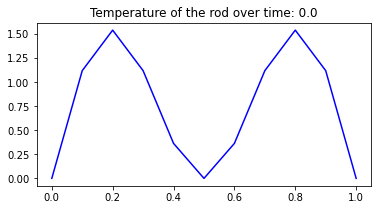

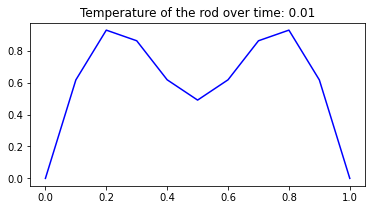

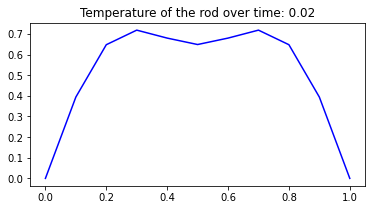

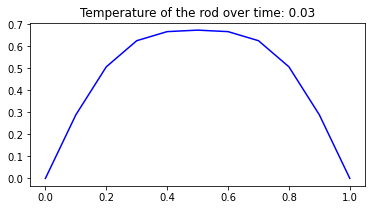

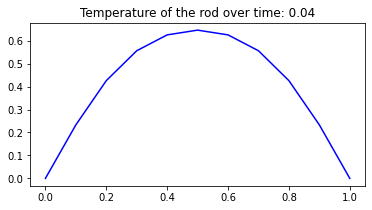

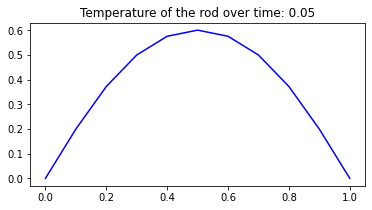

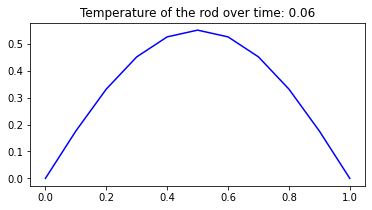

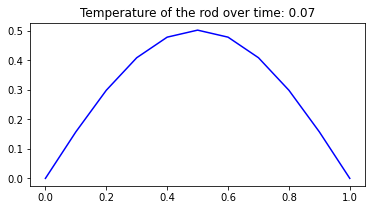

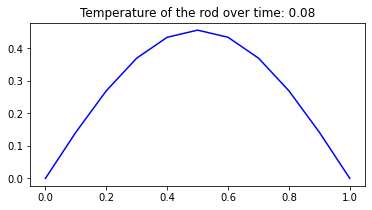

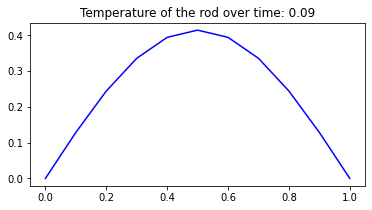

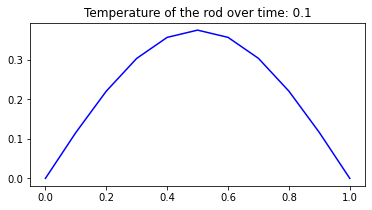

In [4]:
# Ploting the temperature of the rod in determined times:

for k in range(m+1):
    title = "Temperature of the rod over time: "+ str(t_j[k])
    plt.figure(figsize = (6,3));
    plt.title(title)
    plt.plot(x_i,mesh[k][:],'b');
    plt.show();  

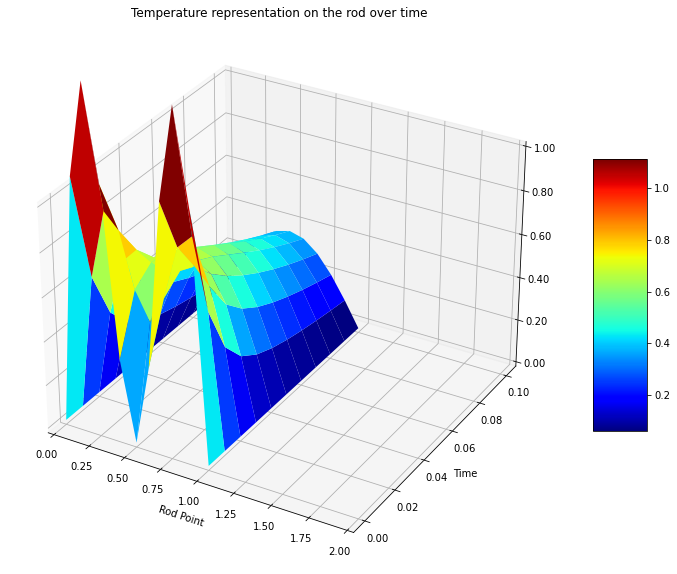

In [5]:
# Representación 3D de la variación de la temperatura de la varilla con respecto del tiempo

fig = plt.figure(figsize=(15,10))
# Type of figure
ax = fig.gca(projection='3d')
# Data
X, T = np.meshgrid(x_i, t_j);
# Value in point (x,t)
Z = np.array(mesh.astype(float));
# Graficamos o trazamos la superficie
surf = ax.plot_surface(X, T, Z, rstride=1, cstride=1,cmap='jet')
# Custome axis z
ax.set_zlim(0, 1)
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('Rod Point')
ax.set_xlim(0,a+1)
ax.set_ylabel('Time')
ax.set_title('Temperature representation on the rod over time')
# Aggregate a barcolor
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
